##Passo 1-Importando os dados necessários

In [ ]:
#!pip uninstall yfinance

Found existing installation: yfinance 0.1.74
Uninstalling yfinance-0.1.74:
  Would remove:
    /usr/local/bin/sample
    /usr/local/lib/python3.8/dist-packages/yfinance-0.1.74.dist-info/*
    /usr/local/lib/python3.8/dist-packages/yfinance/*
Proceed (Y/n)? n


In [ ]:
!pip install yfinance==0.1.74
!pip install mplcyberpunk 

In [ ]:
#Importando os dados
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
#import win32com.client as win32 --> para windows

##Passo 2 - Baixando os dados do Yahoo Finance

In [ ]:
dados_bolsa =["^BVSP","BRL=X"]
hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days=365)
print(um_ano_atras)
dados_mercado = yf.download(dados_bolsa , um_ano_atras,hoje)
display(dados_mercado)
#dados_mercado.reset_index(inplace=True)
#dados_mercado['Date'] = dados_mercado['Date'].dt.normalize()
#dados_mercado.set_index('Date', inplace=True)


2022-02-06 14:59:21.261245
[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP   BRL=X   
Date                                                                 
2022-02-07    5.3269  111996.000000  5.3269  111996.000000  5.3430   
2022-02-08    5.2626  112234.000000  5.2626  112234.000000  5.2849   
2022-02-09    5.2584  112461.000000  5.2584  112461.000000  5.2880   
2022-02-10    5.2345  113359.000000  5.2345  113359.000000  5.2446   
2022-02-11    5.2487  113572.000000  5.2487  113572.000000  5.2512   
...              ...            ...     ...            ...     ...   
2023-01-31    5.1149  113532.000000  5.1149  113532.000000  5.1337   
2023-02-01    5.0722  112303.000000  5.0722  112303.000000  5.0868   
2023-02-02    5.0535  109935.000000  5.0535  109935.000000  5.0545   
2023-02-03    5.0492  108490.000000  5.0492  108490.000000  5.1347   
2023-02-06    5.1852  107863.820312  5.1852  107863.820312  5.1908   

                                Low                Open                Volume  \
                    ^BVSP     BRL=X     ^BVSP     BRL=X          ^BVSP  BRL=X   
Date                                                                            
2022-02-07  112517.000000  5.276800  111490.0  5.326200  112247.000000      0   
2022-02-08  112251.000000  5.251000  110943.0  5.262800  111995.000000      0   
2022-02-09  113163.000000  5.232774  111710.0  5.256489  112233.000000      0   
2022-02-10  113812.000000  5.170000  112163.0  5.231429  112462.000000      0   
2022-02-11  114899.000000  5.182800  113128.0  5.248600  113368.000000      0   
...                   ...       ...       ...       ...            ...    ...   
2023-01-31  113581.000000  5.077500  112145.0  5.114900  112273.000000      0   
2023-02-01  113598.000000  5.047900  110729.0  5.072200  113430.000000      0   
2023-02-02  112943.000000  4.941700  109747.0  5.053500  112072.000000      0   
2023-02-03  110570.000000  5.046758  108185.0  5.049200  110141.000000      0   
2023-02-06  108517.617188  5.128300  107504.5  5.152200  108517.617188      0   

                        
                 ^BVSP  
Date                    
2022-02-07  10672800.0  
2022-02-08  10157500.0  
2022-02-09  13794500.0  
2022-02-10  13267900.0  
2022-02-11  18602800.0  
...                ...  
2023-01-31  12900200.0  
2023-02-01  17821500.0  
2023-02-02  15241800.0  
2023-02-03  13235300.0  
2023-02-06         0.0  

[261 rows x 12 columns]

In [ ]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Dolar', 'Ibovespa']
dados_fechamento = dados_fechamento.dropna()
dados_fechamento

,Dolar,Ibovespa
Date,,
2022-02-07,5.3269,111996.000000
2022-02-08,5.2626,112234.000000
2022-02-09,5.2584,112461.000000
2022-02-10,5.2345,113359.000000
2022-02-11,5.2487,113572.000000
...,...,...
2023-01-31,5.1149,113532.000000
2023-02-01,5.0722,112303.000000
2023-02-02,5.0535,109935.000000


##Criando Tabelas com outros Timeframes

In [ ]:
dados_anuais = dados_fechamento.resample("Y").last()
dados_anuais
#Y significa ano
#last significa o valor da ultima cotacao do ano
#preciso utilizar o resample com mais algum argumento

,Dolar,Ibovespa
Date,,
2022-12-31,5.2668,110031.000000
2023-12-31,5.1852,107863.820312


In [ ]:
dados_mensais = dados_fechamento.resample("M").last()
dados_mensais

,Dolar,Ibovespa
Date,,
2022-02-28,5.1222,113142.000000
2022-03-31,4.7697,119999.000000
2022-04-30,4.9378,107876.000000
2022-05-31,4.7524,111351.000000
2022-06-30,5.1809,98542.000000
2022-07-31,5.1827,103165.000000
2022-08-31,5.1219,109523.000000
2022-09-30,5.3962,110037.000000
2022-10-31,5.2885,116037.000000


##Calcular o fechamento do dia, retorno no ano e retorno no mes do ativo

In [ ]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_anual

,Dolar,Ibovespa
Date,,
2023-12-31,-0.015493,-0.019696


In [ ]:
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_mensal

,Dolar,Ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


In [ ]:
retorno_diario = dados_fechamento.pct_change().dropna()
retorno_diario

,Dolar,Ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825
2023-02-02,-0.003687,-0.021086


##Localizar o fechamento no dia anterior, retorno no mes e retono no ano

In [ ]:
#loc -> selecionar elementos pelo nome
#iloc -> selecionar elementos como uma matriz
retorno_jan_23_26 = retorno_diario.loc['2023-01-26','Dolar']
retorno_jan_23_26


-0.012883437518501739

In [ ]:
retorno_fev_02_23 = retorno_diario.iloc[247,0]
retorno_fev_02_23

-0.003686693477045644

In [ ]:
retorno_ultimo_dia_dolar = retorno_diario.iloc[-1,0]
retorno_ultimo_dia_dolar

0.026934990660065994

In [ ]:
retorno_diario_dolar = retorno_diario.iloc[-1,0]
retorno_diario_bovespa = retorno_diario.iloc[-1,1]

retorno_mensal_dolar = retorno_mensal.iloc[-1,0]
retorno_mensal_bovespa = retorno_mensal.iloc[-1,1]

retorno_anual_dolar = retorno_anual.iloc[-1,0]
retorno_anual_bovespa = retorno_anual.iloc[-1,1]

In [ ]:
retorno_diario_dolar = round((retorno_diario_dolar*100),2)
retorno_diario_bovespa = round((retorno_diario_bovespa*100),2)

retorno_mensal_dolar = round((retorno_mensal_dolar*100),2)
retorno_mensal_bovespa = round((retorno_mensal_bovespa*100),2)

retorno_anual_dolar = round((retorno_anual_dolar*100),2)
retorno_anual_bovespa = round((retorno_anual_bovespa*100),2)

##Fazer os graficos de Performance dos Ativos

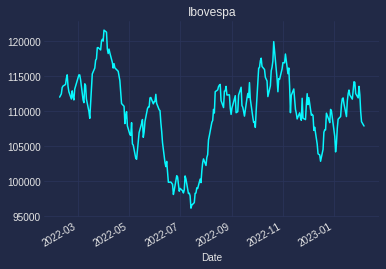

In [ ]:
plt.style.use("cyberpunk")
dados_fechamento.plot(y='Ibovespa', use_index= True, legend= False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi= 300)
plt.show()

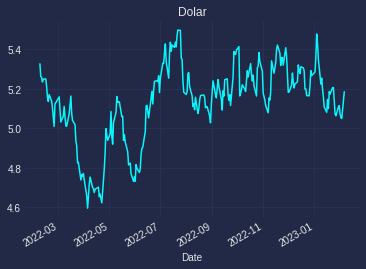

In [ ]:
plt.style.use("cyberpunk")
dados_fechamento.plot(y='Dolar', use_index= True, legend= False)
plt.title('Dolar')
plt.savefig('ibovespa.png', dpi= 300)
plt.show()